# Ad Recommendation Pipeline Demo

This notebook demonstrates a simplified ad recommendation pipeline using:
- Cosine similarity for top-K retrieval
- XGBoost for re-ranking based on combined user + ad features

All data is randomly generated to simulate the pipeline logic.


In [4]:

import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from xgboost import XGBClassifier

# Step 1: Dummy user query and embeddings
np.random.seed(42)
user_embedding = np.random.rand(1, 768)

# Step 2: Dummy ad embeddings
ad_embeddings = np.random.rand(50, 768)  # 50 ads
ad_ids = [f"ad_{i}" for i in range(50)]

# Step 3: Cosine similarity
similarities = cosine_similarity(user_embedding, ad_embeddings).flatten()
top_k_indices = similarities.argsort()[-10:][::-1]

# Step 4: Generate dummy features for reranking
user_features = np.random.rand(1, 5)
ad_features = np.random.rand(50, 5)

# Combine features for top-K ads
top_k_ad_features = ad_features[top_k_indices]
combined_features = np.hstack([np.repeat(user_features, 10, axis=0), top_k_ad_features])

# Step 5: Train dummy XGBoost model on random labels
labels = np.random.randint(0, 2, size=combined_features.shape[0])
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(features_for_rerank, labels)

# Step 6: Predict relevance
probs = xgb.predict_proba(combined_features)[:, 1]
final_ranking = probs.argsort()[::-1]

# Step 7: Output
ranked_ads = [ad_ids[top_k_indices[i]] for i in final_ranking]
print("Top recommended ads:", ranked_ads[:5])


Top recommended ads: ['ad_22', 'ad_36', 'ad_8', 'ad_47', 'ad_10']


C:\Anaconda Navigator\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


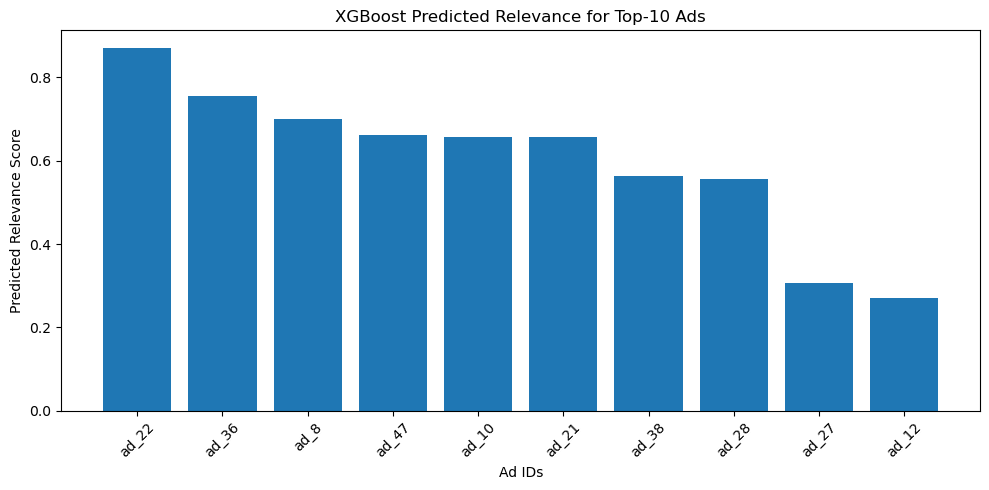

In [5]:
import matplotlib.pyplot as plt

# Plotting the probability scores of top 10 ads
top_10_probs = probs[final_ranking]
top_10_ad_labels = [ad_ids[top_k_indices[i]] for i in final_ranking]

plt.figure(figsize=(10, 5))
plt.bar(top_10_ad_labels, top_10_probs)
plt.xticks(rotation=45)
plt.xlabel("Ad IDs")
plt.ylabel("Predicted Relevance Score")
plt.title("XGBoost Predicted Relevance for Top-10 Ads")
plt.tight_layout()
plt.show()


##  Summary

This notebook shows a simplified ad recommendation system:
- **Embeddings** simulate query and ad understanding
- **Vector retrieval** narrows candidates
- **XGBoost** reranks based on contextual + profile features

